In [7]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Centroid= {1: [26, 16], 2: [68, 42], 3: [55, 76]}


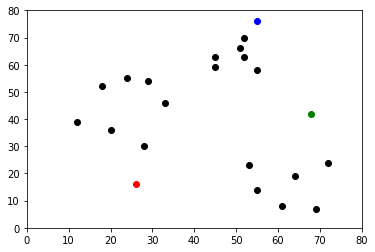

In [8]:
df = pd.DataFrame({
'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
# generate random numbers
np.random.seed(200)
k = 3
#centroids[i] = [x, y]
# Return random integers
centroids = {
i+1:[np.random.randint(0, 80), np.random.randint(0, 80)]
for i in range(k)
}
print("Centroid=",centroids)

plt.scatter(df['x'], df['y'], color='BLACK')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys(): #represent color centroid ..
 plt.scatter(*centroids[i], color=colmap[i]) # .keys() returns a view object that displays a list of all the keys.
 
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

     x   y  distance_from_1  closest color  distance_from_2  distance_from_3
0   12  39        26.925824        1     r        56.080300        56.727418
1   20  36        20.880613        1     r        48.373546        53.150729
2   28  30        14.142136        1     r        41.761226        53.338541
3   18  52        36.878178        1     r        50.990195        44.102154
4   29  54        38.118237        3     b        40.804412        34.058773
5   33  46        30.805844        1     r        35.227830        37.202150
6   24  55        39.051248        3     b        45.880279        37.443290
7   45  59        47.010637        3     b        28.600699        19.723083
8   45  63        50.695167        3     b        31.144823        16.401219
9   52  70        59.933296        3     b        32.249031         6.708204
10  51  66        55.901699        3     b        29.410882        10.770330
11  52  63        53.712196        3     b        26.400758        13.341664

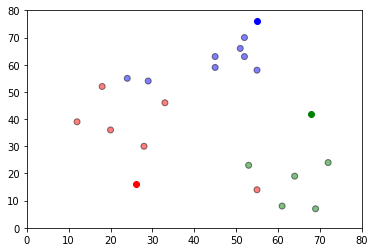

In [9]:
def assignment(df, centroids):
 for i in centroids.keys(): 
# start from 1 to 3 everytimes 
 # sqrt((x1 - x2)^2 + (y1 - y2)^2)
  df['distance_from_{}'.format(i)] =( np.sqrt( (df['x'] - centroids[i][0]) ** 2 +(df['y'] - centroids[i][1]) ** 2 ))
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  #.idmin) 
  #finding the nearest data in the dataframe
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
 return df
df = assignment(df, centroids)
print(df)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
 plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


Updated centroids  {1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


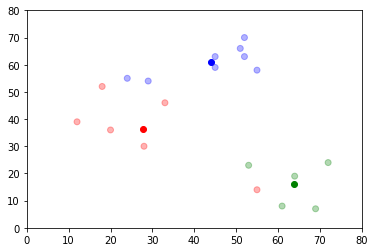

In [10]:
import copy
old_centroids = copy.deepcopy(centroids) # create bindings between a target and an object.
def update(k):
 for i in centroids.keys():
  centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
  centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
 return k
centroids = update(centroids)
print("Updated centroids ", centroids)

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3) # alpha value for intensity
for i in centroids.keys():
 plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()